# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importando os arquivos
funcionaris_df = pd.read_csv('CadastroFuncionarios.csv', sep=';',decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';',decimal=',')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

#retirar colunas estado civil e cargos da tabela funcionarios
funcionaris_df = funcionaris_df.drop(['Estado Civil', 'Cargo'], axis=1) #0 é linha e 1 é coluna

display(funcionaris_df)
display(clientes_df)
display(servicos_df)



,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


2717493.22
A folha salarial total da empresa é de R$2,717,493.22


C:\Users\Fábio\AppData\Local\Temp\ipykernel_17880\4249912195.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  somas_salarios = funcionaris_df.groupby('Area').sum()


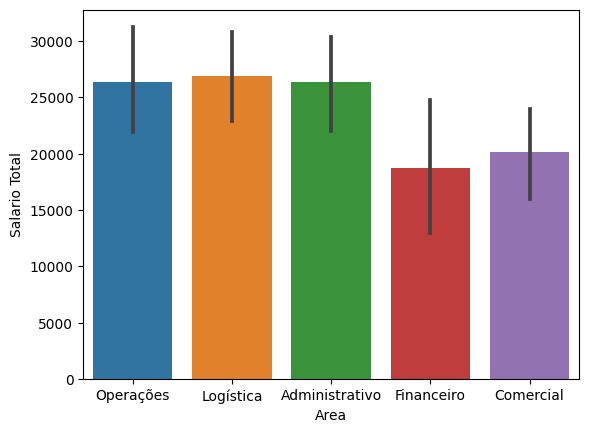

In [105]:
#1. Valor Total da Folha Salarial
funcionaris_df['Salario Total'] = funcionaris_df['Salario Base'] + funcionaris_df['Impostos'] + funcionaris_df['Beneficios'] + funcionaris_df['VT'] + funcionaris_df['VR']
print(funcionaris_df['Salario Total'].sum())
somas_salarios = funcionaris_df.groupby('Area').sum()
#plt.bar(funcionaris_df['Area'], funcionaris_df['Salario Total'])
sns.barplot(x="Area", y="Salario Total", data=funcionaris_df)

print('A folha salarial total da empresa é de R${:,}'.format(funcionaris_df['Salario Total'].sum()))

In [106]:
#2. Faturamento da empresa
faturamentos_df = servicos_df.merge(clientes_df, on='ID Cliente') # junta um df no outro com base na coluna id cliente
faturamentos_df["Valor Contrato Total"] = faturamentos_df["Tempo Total de Contrato (Meses)"] * faturamentos_df["Valor Contrato Mensal"]
print('o faturamento total da empresa é de R${:,}'.format(faturamentos_df["Valor Contrato Total"].sum()))
display(faturamentos_df)

o faturamento total da empresa é de R$5,519,160


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Cliente,Valor Contrato Mensal,Valor Contrato Total
0,OS0001,67,1,14,Teixeira Gonçalves,540,7560
1,OS0002,17,2,12,Souza Santos,1260,15120
2,OS0003,116,4,14,Santos Costa,2520,35280
3,OS0004,37,5,8,Do Monteiro,3510,28080
4,OS0005,130,6,8,Soares Lobo,2340,18720
...,...,...,...,...,...,...,...
232,OS0233,111,315,4,Americo Bomfim,1575,6300
233,OS0234,124,316,8,Manoel Costa,3690,29520
234,OS0235,72,317,6,Gomes Machado,2385,14310
235,OS0236,90,319,14,Pereira Fazenda,4185,58590


In [107]:
#3. % de funcionários que já fechou algum contrato?
Qtde_Funcionarios_Fecharam_Serviço =  len(servicos_df['ID Funcionário'].unique())
Qtde_Funcionários_Totais = len(funcionaris_df['ID Funcionário'])
print('O percentual de funcionarios qe fecharam contrato foi de {:%}'.format(Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais))


O percentual de funcionarios qe fecharam contrato foi de 86.842105%


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


,ID Funcionário,Valor Contrato Total,Area
0,67,7560,Financeiro
1,67,10260,Financeiro
2,67,13680,Financeiro
3,67,5670,Financeiro
4,17,15120,Logística
...,...,...,...
232,25,11340,Administrativo
233,79,19350,Operações
234,99,29880,Administrativo
235,14,44820,Financeiro


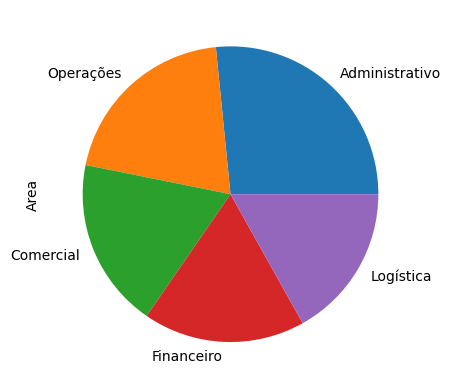

In [136]:
#4. total de contratos que cada área da empresa
faturamento_area = faturamentos_df[['ID Funcionário','Valor Contrato Total']].merge(funcionaris_df[['Area', 'ID Funcionário']], on='ID Funcionário')
contratos_area_qtde = faturamento_area['Area'].value_counts()
print(contratos_area_qtde)
contratos_area_qtde.plot(kind='pie')

display(faturamento_area)

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


<Axes: >

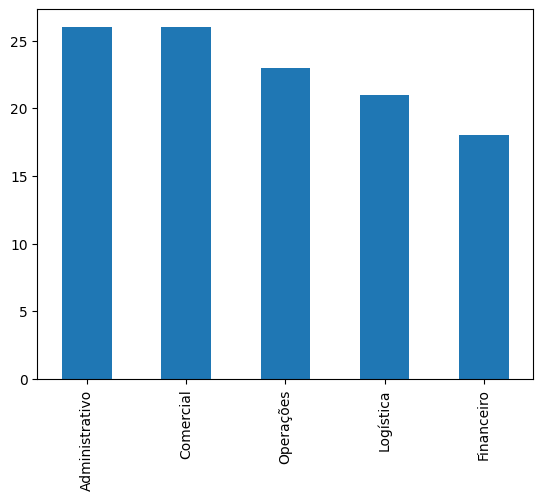

In [132]:
#5. total de funcionários por área
funcionarios_area = funcionaris_df['Area'].value_counts()
print(funcionarios_area)
funcionarios_area.plot(kind='bar')

In [137]:
#6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print('Ticket Médio mensal: R$ {:,.2f}'.format(ticket_medio))

Ticket Médio mensal: R$ 2,502.56
